# Logistic Regression

## Sigmoid function 


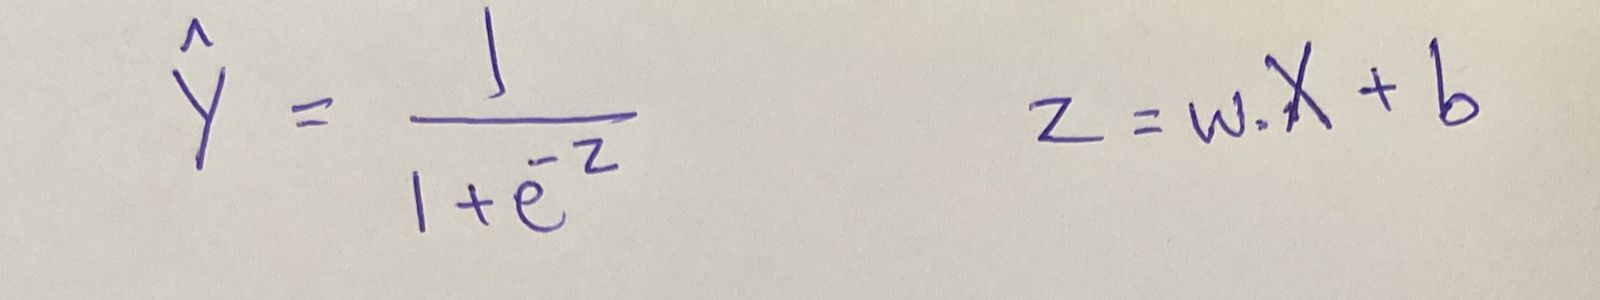


where , 
       
       Y_hat--> predicted value 
       
       X --> Input variable
       
       w --> weight 
       
       b --> bias 

## Grident Descent 

Used to update parameters of the learning model 

**w = w - l*dw**

**b = b - l*db**

where, l--> learning rate

### derivatives 

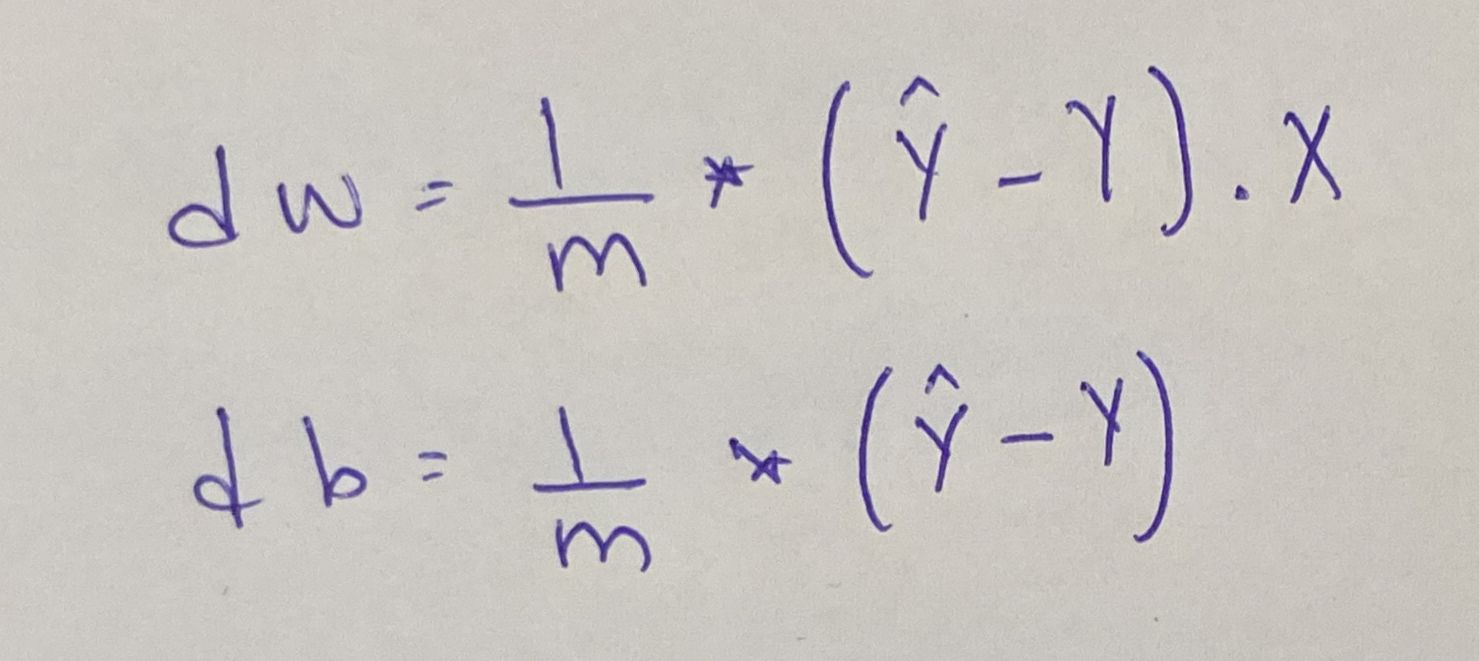

In [25]:
#importing the numpy lib

import numpy as np

In [26]:
class Logistic_Regression():

    def __init__ (self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self,X,Y):

        #taking the data and features
        self.m,self.n = X.shape #no of (rows and columns)

        #initlizing the weights and bias 
        self.w = np.zeros(self.n)
        self.b = 0
        self.X= X
        self.Y = Y

        #implementing the Grident Descent 
        for i in range(self.no_of_iterations):
            self.update_weight()

    def update_weight(self):
        #sigmoid function
        Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))

        #calculating the gradients derivatives
        dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
        db = (1/self.m)*np.sum(Y_hat - self.Y)

        #updating the weights and bias 
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self,X):
        Y_predict = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
        Y_predict = np.where(Y_predict > 0.5,1,0)
        return Y_predict

## Using the built Logistic Regression model in program 

In [27]:
# importing libraries 

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# loading the data 

df = pd.read_csv("diabetes.csv")

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.shape

(768, 9)

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [35]:
# sperating the values to features and target 

features = df.drop(columns='Outcome',axis=1)
target = df['Outcome']

In [36]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [38]:
# doing scalarization of the data 

scaler = StandardScaler()

scaler.fit(features)

#transforming
standard_data = scaler.transform(features)

In [39]:
standard_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [40]:
features = standard_data

In [41]:
# doing train test split of the data

X_train,X_test ,Y_train,Y_test = train_test_split(features,target,random_state = 2,test_size = 0.2)

In [42]:
print('Original : ',features.shape)
print('train_data : ',X_train.shape,Y_train.shape)
print('test_data : ',X_test.shape,Y_test.shape)

Original :  (768, 8)
train_data :  (614, 8) (614,)
test_data :  (154, 8) (154,)


In [43]:
# training the data

model = Logistic_Regression(learning_rate=0.01,no_of_iterations=1000)

model.fit(X_train,Y_train)

In [47]:
#accuracy of test data

X_test_predict = model.predict(X_test)
accuracy_x_test = accuracy_score(Y_test,X_test_predict)

In [48]:
print("Accuracy of test data : ",accuracy_x_test)

Accuracy of test data :  0.7662337662337663


In [50]:
#accuracy of train data

X_train_predict = model.predict(X_train)
accuracy_x_train = accuracy_score( Y_train, X_train_predict)

In [51]:
print("Accuracy of train data : ",accuracy_x_train)

Accuracy of train data :  0.7768729641693811


### checking predicton on a custom output 

In [56]:
input_data = np.array([5,166,72,19,175,25.8,0.587,51])

#reshaping the data to 2D array 
input_data_reshape = input_data.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\sanka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
